# Heart Failure Predictor

In [7]:
#Hacemos los imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Column Brief Description
- **Age**: Patient's Age (int)
- **Anaemia**: Decrease of red blood cells or hemoglobin (boolean)
- **Creatinine_phosphokinase**: Level of the CPK enzyme in the blood (mcg/L)
- **Diabetes**: If the patient has diabetes (boolean)
- **Ejection_fraction**: Percentage of blood leaving the heart at each contraction (percentage)
- **High_blood_pressure**: If the patient has hypertension (boolean)
- **Platelets**: Platelets in the blood (kiloplatelets/mL)
- **Serum_creatinine**: Level of serum creatinine in the blood (mg/dL)
- **Serum_sodium**: Level of serum sodium in the blood (mEq/L)
- **Sex** (binary)
- **Smoking**: If the patient smokes or not (boolean)
- **Time**: Follow-up period (days)
- **DEATH_EVENT**: If the patient deceased during the follow-up period (boolean)

In [8]:
full_data = pd.read_csv(r'C:\Users\Gonzalo\Documents\DH\Contenido\ds_blend_students_2020\Proyectos Propios\Prediction Models\Heart Failure Prediction\heart_failure_clinical_records_dataset.csv')
full_data.head()


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## Data Overview

In [9]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [10]:
full_data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

No parece haber valores faltantes.

In [11]:
full_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


### Observations:

As the max value is quite higher than the Q3 and the min value is much lower than the Q1, we have to check for outliers:
- Creatinine_phosphokinase (high outlier and low outlier)
- Ejection_fraction
- Platelets (high outlier and low outlier)
- Serum_creatinine
- Serum_sodium (only a low outlier)

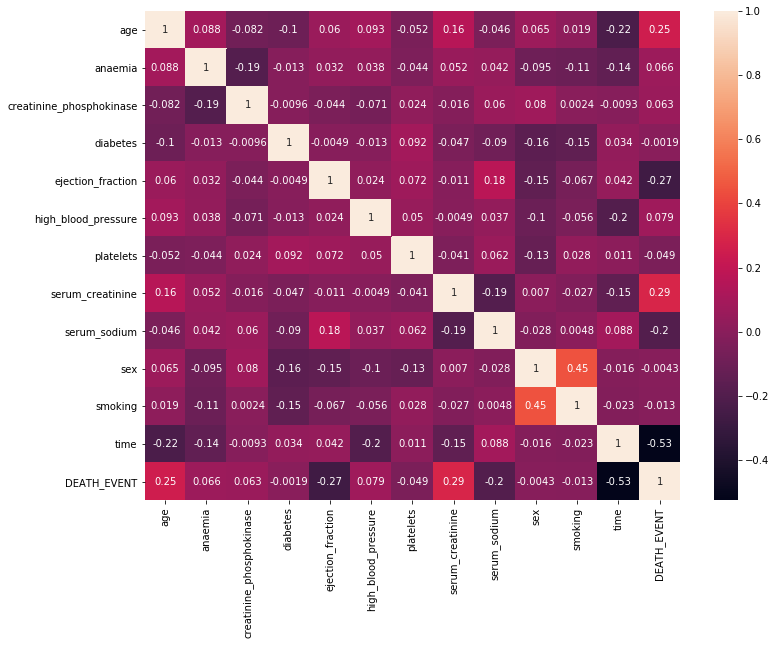

In [12]:
plt.figure(figsize=[12,9])
sns.heatmap(data= full_data.corr(),annot=True)

### Observations 
- Smoking seems to be quite related to Sex.
- The more time a patient spends in observation, the less likely it is to die while under observation.

## Data Visualization - Death event VS Variables

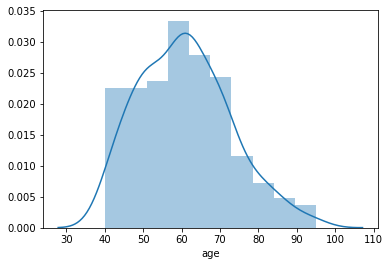

In [13]:
sns.distplot(a=full_data['age'])

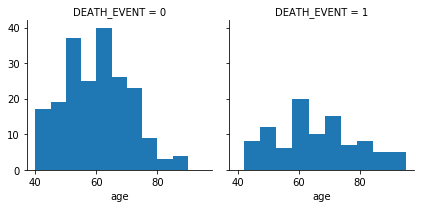

In [14]:
g = sns.FacetGrid(full_data, col='DEATH_EVENT')
g.map(plt.hist, 'age', bins=10)

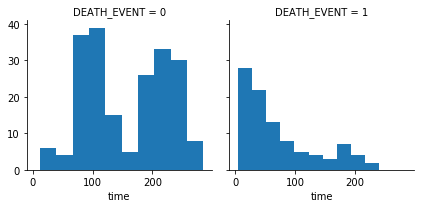

In [15]:
g = sns.FacetGrid(full_data, col='DEATH_EVENT')
g.map(plt.hist, 'time', bins=10)

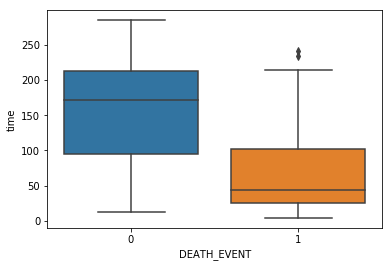

In [16]:
sns.boxplot(data=full_data, x='DEATH_EVENT',y='time')

## Outliers

As the max value is quite higher than the Q3 and the min value is much lower than the Q1, we have to check for outliers:
- Creatinine_phosphokinase (high outlier and low outlier)
- Ejection_fraction
- Platelets (high outlier and low outlier)
- Serum_creatinine
- Serum_sodium (only a low outlier)

### Creatinine_Phosphokinase

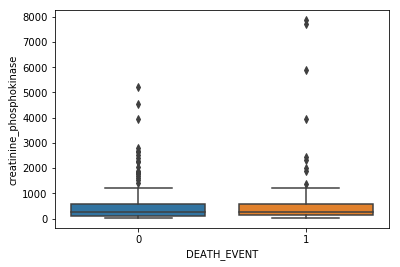

In [17]:
sns.boxplot(y='creatinine_phosphokinase',x='DEATH_EVENT', data=full_data)

In [18]:
#Drop values higher than 1500
full_data.drop(full_data[full_data['creatinine_phosphokinase'] > 1500].index,inplace=True)

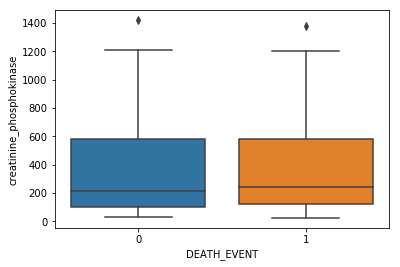

In [19]:
sns.boxplot(y='creatinine_phosphokinase',x='DEATH_EVENT', data=full_data)

### Ejection_Fraction

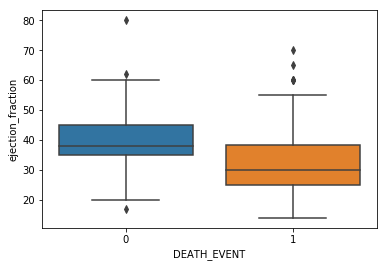

In [20]:
sns.boxplot(y='ejection_fraction',x='DEATH_EVENT', data=full_data)

In [21]:
full_data.drop(full_data[full_data['ejection_fraction'] > 70].index,inplace=True)

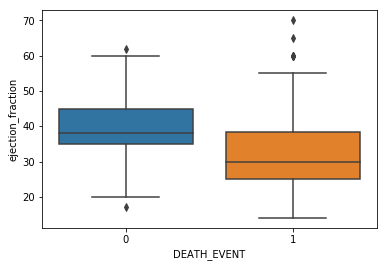

In [22]:
sns.boxplot(y='ejection_fraction',x='DEATH_EVENT', data=full_data)

### Platelets

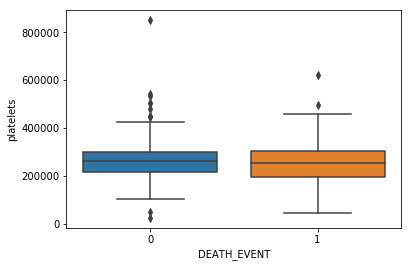

In [23]:
sns.boxplot(y='platelets',x='DEATH_EVENT', data=full_data)

In [24]:
full_data.drop(full_data[full_data['platelets'] > 600000].index,inplace=True)

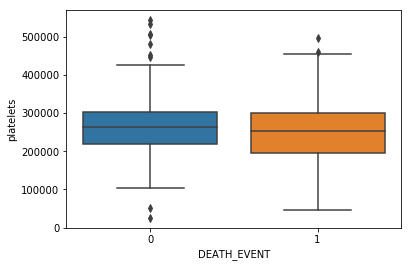

In [25]:
sns.boxplot(y='platelets',x='DEATH_EVENT', data=full_data)

### Serum creatinine

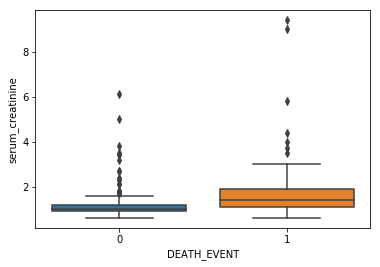

In [26]:
sns.boxplot(y='serum_creatinine',x='DEATH_EVENT', data=full_data)

In [27]:
full_data.drop(full_data[full_data['serum_creatinine'] > 4.5].index,inplace=True)

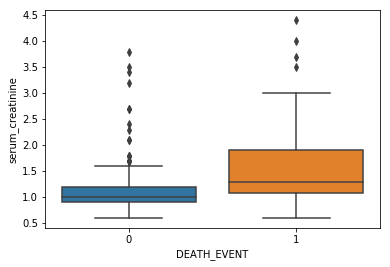

In [28]:
sns.boxplot(y='serum_creatinine',x='DEATH_EVENT', data=full_data)

### Serum sodium

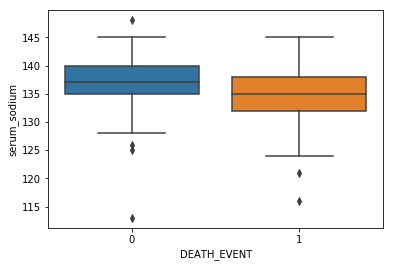

In [29]:
sns.boxplot(y='serum_sodium',x='DEATH_EVENT', data=full_data)

In [30]:
full_data.drop(full_data[full_data['serum_sodium'] < 120].index,inplace=True)

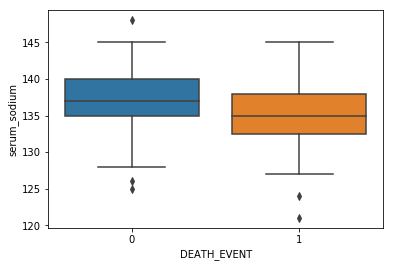

In [31]:
sns.boxplot(y='serum_sodium',x='DEATH_EVENT', data=full_data)

## Modeling 

### Imports

In [37]:
#Tools
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

#Models
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#Pipelines + CV
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

### Creating the Vectors

In [33]:
X_train, X_test, y_train, y_test = train_test_split(full_data.drop('DEATH_EVENT',axis=1),full_data['DEATH_EVENT'],test_size=0.2,)

## Modeling

### Naive Bayes

In [1]:
#Instantiate 
gnb = GaussianNB()

#Training the Model - Fit
gnb.fit(X_train, Y_train)

#Predicting with the model
Y_pred_gnb = gnb.predict(X_test)

#Measure accuracy
accuracy_score(Y_test, Y_pred_gnb)

NameError: name 'GaussianNB' is not defined

---

### Logistic Regression

In [35]:
# Instantiate
logreg = LogisticRegression()

#Training the Model - Fit
logreg = logreg.fit(X_train,y_train)

#Predicting with the model
y_pred_logreg = logreg.predict(X_test)

#Measure accuracy
accuracy_score(y_test,y_pred_logreg)

0.8301886792452831

### Logistic Regression CV - Pipeline

In [87]:
lrsteps = [('logreg', LogisticRegression())]

lrpipe = Pipeline(lrsteps)

lrparam_grid = [
    {'logreg__penalty':['l1','l2','elasticnet','none'],
    'logreg__C' : [1.0,10.0,100.0],
    'logreg__solver': ['lbfgs','newton-cg','liblinear','sag','saga']}
]

lrgrid = GridSearchCV(lrpipe, lrparam_grid, cv= 3)

In [88]:
lrgrid.fit(X_train, y_train)

C:\Users\Gonzalo\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Gonzalo\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\Gonzalo\anaconda3\envs\dhdsblend\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver sag supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFaile

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('logreg',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
                                                           n_jobs=None,
                                                           penalty='l2',
                                                           random_state=None,
                                              

In [89]:
lrgrid.best_estimator_

Pipeline(memory=None,
         steps=[('logreg',
                 LogisticRegression(C=100.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [90]:
lrgrid.best_score_

0.8325741890959281

---

### Random Forest

In [97]:
rfor = RandomForestClassifier()

rfor = rfor.fit(X_train,y_train)

y_pred_rfor = rfor.predict(X_test)

accuracy_score(y_test,y_pred_rfor)

0.8679245283018868

### Random Forest CV - Pipeline

In [3]:
rforsteps = [('rfor', RandomForestClassifier())]

rforpipe = Pipeline(rforsteps)

n_estimators = np.arange(10,100)

rfor_max_depth = [2,4]

rfor_min_samples_split = [2,5]

rfor_max_features = ['auto','sqrt']

rfor_bootstrap = [True,False]

rfor_param_grid = [
    {'rfor__n_estimators':n_estimators,
    'rfor__max_depth':rfor_max_depth,
    'rfor__min_samples_split':rfor_min_samples_split,
    'rfor__max_features':rfor_max_features,
    'rfor__bootstrap':rfor_bootstrap}
]

rfor_grid = GridSearchCV(rforpipe, rfor_param_grid, cv= 3)

NameError: name 'RandomForestRegressor' is not defined

In [101]:
rfor_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('rfor',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features='auto',
                                                               max_leaf_nodes=None,
                                                               max_samples=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                             

In [102]:
rfor_grid.best_estimator_

Pipeline(memory=None,
         steps=[('rfor',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=4, max_features='sqrt',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=30, n_jobs=None,
                                        oob_score=False, random_state=None,
                                        verbose=0, warm_start=False))],
         verbose=False)

In [103]:
rfor_grid.best_score_

0.870600414078675

---

### Decision Tree

In [107]:
dtree = DecisionTreeClassifier()

dtree = dtree.fit(X_train,y_train)

y_pred_dtree = dtree.predict(X_test)

accuracy_score(y_test,y_pred_dtree)

0.7358490566037735

### Decision Tree CV - Pipeline

In [118]:
dtree_steps = [('dtree', DecisionTreeClassifier())]

dtree_pipe = Pipeline(dtree_steps)

dtree_max_depth = [2,4,None]

dtree_min_samples_split = [2,5]

dtree_max_features = ['auto','sqrt']

dtree_param_grid = [
    {'dtree__max_depth':dtree_max_depth,
    'dtree__min_samples_split':dtree_min_samples_split,
    'dtree__max_features':dtree_max_features}
]

dtree_grid = GridSearchCV(dtree_pipe, dtree_param_grid, cv= 3)

In [119]:
dtree_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('dtree',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                                                               min_impurity_split=None,
                                                               min_samples_leaf=1,
                                                               min_samples_split=2,
                                       

In [120]:
dtree_grid.best_estimator_

Pipeline(memory=None,
         steps=[('dtree',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=5,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=None,
                                        splitter='best'))],
         verbose=False)

In [121]:
dtree_grid.best_score_

0.8036576949620428

---

### KNNeighbors

In [127]:
kn = KNeighborsClassifier()

kn = kn.fit(X_train,y_train)

y_pred_kn = kn.predict(X_test)

accuracy_score(y_test,y_pred_kn)

0.5471698113207547

### KNNeighbors CV - Pipeline

In [123]:
knn_steps = [('knn', KNeighborsClassifier())]

knn_pipe = Pipeline(knn_steps)

knn_n_neighbours = np.arange(1,31)

weights= ['uniform','distance']

knn_param_grid = [
    {'knn__n_neighbors': knn_n_neighbours,
    'knn__weights' : weights}
]

knn_grid = GridSearchCV(knn_pipe, knn_param_grid, cv= 3)

In [124]:
# Hacemos fit a la grid
knn_grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
                          'knn__weights': ['

In [125]:
knn_grid.best_estimator_

Pipeline(memory=None,
         steps=[('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=20, p=2,
                                      weights='uniform'))],
         verbose=False)

In [126]:
knn_grid.best_score_

0.6890269151138716